# Exploratory Analysis

By: Oscar Ko

This notebook was created for exploratory data analysis on this dataset from Stanford:

https://data.stanford.edu/hcmst2017

---
---

# Step 1: Imports and Data

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("data/df_renamed.csv")

print(df.shape, "\n")

df.info(verbose=True)

(2844, 75) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2844 non-null   int64  
 1   ID                                2844 non-null   int64  
 2   ageGap                            2844 non-null   float64
 3   attendReligiousServiceFreq        2844 non-null   object 
 4   employmentStatus                  2844 non-null   object 
 5   genderSubjectAttractedTo          2837 non-null   object 
 6   houseType                         2844 non-null   object 
 7   householdAdults_num               2844 non-null   int64  
 8   householdIncome                   2844 non-null   int64  
 9   householdMinor_num                2844 non-null   int64  
 10  householdSize                     2844 non-null   int64  
 11  interracial                       2822 non-null   object

### Test-Train Stratified Split

- Stratified split to ensure equal proportions of all labels in both sets.
- Use on "relationshipQuality_isGood"

First drop the other two outcome labels, leaving just "relationshipQuality_isGood"

In [2]:
# Remove "relationshipQuality" and "relationshipQuality_num"

df_copy = df.copy().drop(["relationshipQuality", "relationshipQuality_num"], axis=1)

success1 = "relationshipQuality_num" not in df_copy.columns
success2 = "relationshipQuality" not in df_copy.columns

print("Sucessfully removed both columns?", success1 & success2)

Sucessfully removed both columns? True


**The Split**

In [3]:
# import package
from sklearn.model_selection import train_test_split

# declare our X inputs and y outcomes
X = df_copy.drop("relationshipQuality_isGood", axis=1)
y = df_copy["relationshipQuality_isGood"]


# stratify split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

print("\n")
print("y_train class proportions: \n", y_train.value_counts(normalize=True))

print("\n")
print("y_test class proportions: \n", y_test.value_counts(normalize=True))

X_train.shape =  (2275, 72)
X_test.shape =  (569, 72)
y_train.shape =  (2275,)
y_test.shape =  (569,)


y_train class proportions: 
 1    0.90989
0    0.09011
Name: relationshipQuality_isGood, dtype: float64


y_test class proportions: 
 1    0.910369
0    0.089631
Name: relationshipQuality_isGood, dtype: float64


### X_train Summary Statistics

In [4]:
X_train.describe()

,Unnamed: 0,ID,ageGap,householdAdults_num,householdIncome,householdMinor_num,householdSize,met_YearFraction,met_to_shipStart_diff,moveIn_YearFraction,...,partnerParty_DemPos_RepNeg,partyDifference,shipStart_YearFraction,shipStart_to_moveIn_YearFraction,subjectAge,subjectAgeWhenMet,subjectEduc_years,subjectMotherEduc_years,subjectParty_DemPos_RepNeg,timesDivorcedOrWidowed
count,2275.000000,2.275000e+03,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2250.000000,2200.000000,1930.000000,...,2275.000000,2275.000000,2208.000000,1889.000000,2275.000000,2250.000000,2275.000000,2271.000000,2275.000000,2269.000000
mean,1785.339341,2.175449e+06,4.370110,2.200440,93148.901099,0.560879,2.761319,1994.377522,1.617764,1995.512353,...,-0.029011,1.191209,1996.054011,1.932019,49.288791,26.171111,14.100220,12.343901,0.142418,0.360952
std,1010.610098,6.470539e+05,6.120972,0.895754,67842.768330,1.021820,1.437559,16.889129,4.435628,15.874591,...,1.903809,1.176175,16.609877,2.712029,16.323754,11.241342,2.528392,3.128096,2.117259,0.661148
min,1.000000,5.300100e+04,0.000000,1.000000,2500.000000,0.000000,1.000000,1939.208400,0.000000,1944.375000,...,-3.000000,0.000000,1942.375000,0.000000,18.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,914.500000,1.811954e+06,1.000000,2.000000,45000.000000,0.000000,2.000000,1981.458400,0.000000,1983.625000,...,-1.000000,0.000000,1983.625000,0.333374,35.000000,18.000000,12.000000,12.000000,-2.000000,0.000000
50%,1807.000000,2.279341e+06,3.000000,2.000000,80000.000000,0.000000,2.000000,1997.791600,0.166748,1998.458400,...,0.000000,1.000000,1999.541600,1.083252,51.000000,23.000000,13.000000,12.000000,1.000000,0.000000
75%,2653.000000,2.762445e+06,6.000000,2.000000,112500.000000,1.000000,4.000000,2008.708400,1.083283,2009.458400,...,1.000000,2.000000,2010.291600,2.416626,62.000000,31.000000,16.000000,14.000000,2.000000,1.000000
max,3508.000000,2.969933e+06,86.000000,9.000000,300000.000000,8.000000,10.000000,2017.541600,54.750000,2017.541600,...,3.000000,6.000000,2017.875000,31.500000,93.000000,84.000000,20.000000,20.000000,3.000000,4.000000


### Check the training set for missing values

In [5]:
# combine the X_train and y_train into a dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# check records and features
print(training_set.shape)

(2275, 73)


In [6]:
# Check for any missing values
print(training_set.isnull().values.any())

# Check number of missing values
print("Count of na's:", training_set.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

True
Count of na's: 2252
Cases with missing values: 469


In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

training_set.isna().sum()

Unnamed: 0                            0
ID                                    0
ageGap                                0
attendReligiousServiceFreq            0
employmentStatus                      0
genderSubjectAttractedTo              7
houseType                             0
householdAdults_num                   0
householdIncome                       0
householdMinor_num                    0
householdSize                         0
interracial                          19
isHispanic                            0
isLivingTogether                      0
isMarried                             0
isMetroArea                           0
metAs_coworkers                      49
metAs_customerAndClient              49
metAs_workNeighbors                  49
metIn_church                         49
metIn_college                        49
metIn_military                       49
metIn_privateParty                   49
metIn_public                         49
metIn_restaurantOrBar                49


### Remove unneeded columns

Columns related to couples first moving in together have over 300 missing values. This is due to not all couples moving in together. Since 300 is a large chunk of our 2275 records, I will remove these columns.

In [8]:
columns_to_remove = [
    "moveIn_YearFraction",
    "shipStart_to_moveIn_YearFraction",
    "Unnamed: 0", # Also Remove column with no useful info
    "ID" # Also Remove column with no useful info
]

# anything done to the training set has to be done to the testing set
training_set.drop(columns_to_remove, axis=1, inplace=True)
X_train.drop(columns_to_remove, axis=1, inplace=True)
X_test.drop(columns_to_remove, axis=1, inplace=True)

# Recheck the na's
training_set.isna().sum()

ageGap                               0
attendReligiousServiceFreq           0
employmentStatus                     0
genderSubjectAttractedTo             7
houseType                            0
householdAdults_num                  0
householdIncome                      0
householdMinor_num                   0
householdSize                        0
interracial                         19
isHispanic                           0
isLivingTogether                     0
isMarried                            0
isMetroArea                          0
metAs_coworkers                     49
metAs_customerAndClient             49
metAs_workNeighbors                 49
metIn_church                        49
metIn_college                       49
metIn_military                      49
metIn_privateParty                  49
metIn_public                        49
metIn_restaurantOrBar               49
metIn_school                        49
metIn_voluntaryOrg                  49
metOn_blindDate          

In [9]:
# Check all cases and columns
print(training_set.shape)

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

(2275, 69)
Cases with missing values: 183


Since 183 records is not too much compared to the 2275 in total, I will op to remove these missing values.

In [10]:
# Dropping NA values

def cleanDatasets(X_data, y_data):
    
    cols_with_na = X_data.columns[X_data.isna().any()].tolist()
    
    for col in cols_with_na:
        
        indexes = X_data[col].notna()
        X_data = X_data[indexes]
        y_data = y_data[indexes]
    
    # filter odd partner age cases
    age_filter = X_data["partnerAge"] > 5
    X_data = X_data[age_filter]
    y_data = y_data[age_filter]
    
    return X_data, pd.DataFrame(y_data)

# anything done to the training set has to be done to the testing set        
X_train, y_train = cleanDatasets(X_train, y_train)
X_test, y_test = cleanDatasets(X_test, y_test)


# recombine training sets
training_set = pd.concat([X_train, y_train], axis=1)


# Check all cases and columns
print(training_set.shape)

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

(2086, 69)
Cases with missing values: 0


In [11]:
print(X_train.shape, X_test.shape)

(2086, 68) (522, 68)


---
---
# Step 2: Exploratory Data Analysis

In [12]:
X_train.describe()

,ageGap,householdAdults_num,householdIncome,householdMinor_num,householdSize,met_YearFraction,met_to_shipStart_diff,numRelativesSeePerMonth,partnerAge,partnerEduc_years,partnerMotherEduc_years,partnerParty_DemPos_RepNeg,partyDifference,shipStart_YearFraction,subjectAge,subjectAgeWhenMet,subjectEduc_years,subjectMotherEduc_years,subjectParty_DemPos_RepNeg,timesDivorcedOrWidowed
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,4.057047,2.196069,93870.445829,0.547459,2.743528,1994.269459,1.640859,3.441515,49.054171,14.272531,12.370566,-0.021572,1.192234,1995.909358,49.318313,26.082934,14.157239,12.409396,0.148610,0.355225
std,4.683775,0.872936,67579.043960,1.007121,1.398147,16.799039,4.469024,5.097531,16.120215,2.449912,3.104074,1.914232,1.179748,16.569211,16.187994,11.155295,2.502318,3.058297,2.120125,0.659110
min,0.000000,1.000000,2500.000000,0.000000,1.000000,1939.208400,0.000000,0.000000,10.000000,0.000000,0.000000,-3.000000,0.000000,1942.375000,18.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,1.000000,2.000000,45000.000000,0.000000,2.000000,1981.312450,0.000000,0.000000,35.000000,12.000000,12.000000,-1.000000,0.000000,1983.375000,35.000000,18.000000,12.000000,12.000000,-2.000000,0.000000
50%,3.000000,2.000000,80000.000000,0.000000,2.000000,1997.625000,0.166748,2.000000,50.000000,14.000000,12.000000,0.000000,1.000000,1999.333300,51.000000,23.000000,13.000000,12.000000,1.000000,0.000000
75%,5.000000,2.000000,112500.000000,1.000000,4.000000,2008.604150,1.083374,5.000000,62.000000,16.000000,14.000000,1.000000,2.000000,2010.104150,62.000000,31.000000,16.000000,14.000000,2.000000,1.000000
max,45.000000,9.000000,300000.000000,8.000000,10.000000,2017.541600,54.750000,50.000000,95.000000,20.000000,20.000000,3.000000,6.000000,2017.875000,93.000000,84.000000,20.000000,20.000000,3.000000,4.000000


#### Check if the labels in the training set are balanced

In [13]:
y_train.value_counts()

relationshipQuality_isGood
1                             1905
0                              181
dtype: int64

**NOTES:** This is an imbalanced dataset where most of the outcome labels are of one class. This is important to remember for when applying machine learning.

In [14]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation Matrix Heatmap (Columns 0 to 45)

<AxesSubplot:>

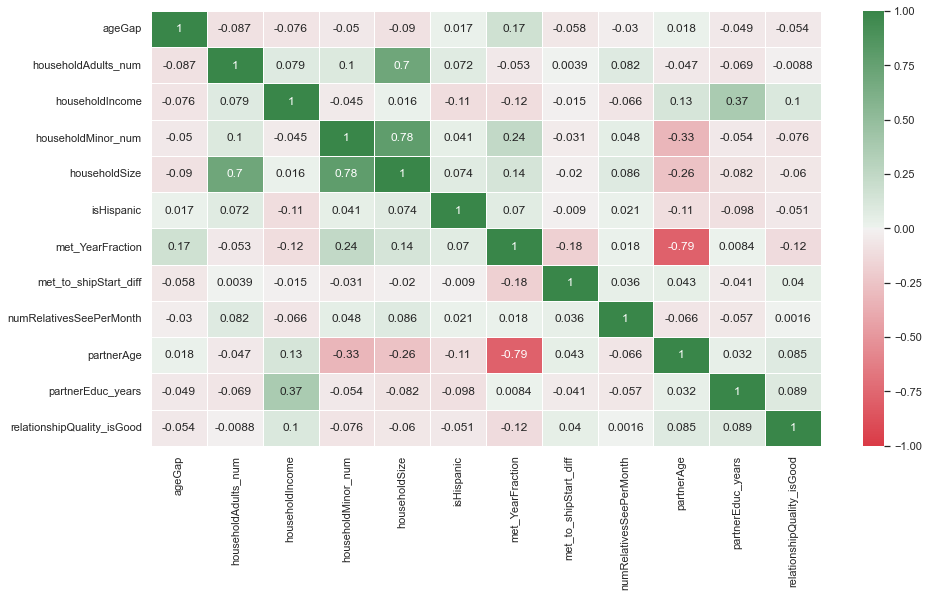

In [15]:
# limit the number of columns
corr_df = training_set.iloc[:,0:45]
corr_df["relationshipQuality_isGood"] = training_set["relationshipQuality_isGood"]

# calculate the correlation matrix
corr_matrix = corr_df.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

**Notes:** 

- It seems most of the columns visualized here do not have much correlation with relationshipQuality_isGood.

- Higher household income seems to be slightly correlated with higher rated relationships.

- Number of Household size & number of minors in household are correlated because they are both based on counting household members. When using machine learning, it might be best to keep this in mind.

    - (Same for met_YearFraction and PartnerAge/SubjectAge. Older couples probably met in earlier years.)

---

### Correlation Matrix Heatmap (Columns 45 to 90)

<AxesSubplot:>

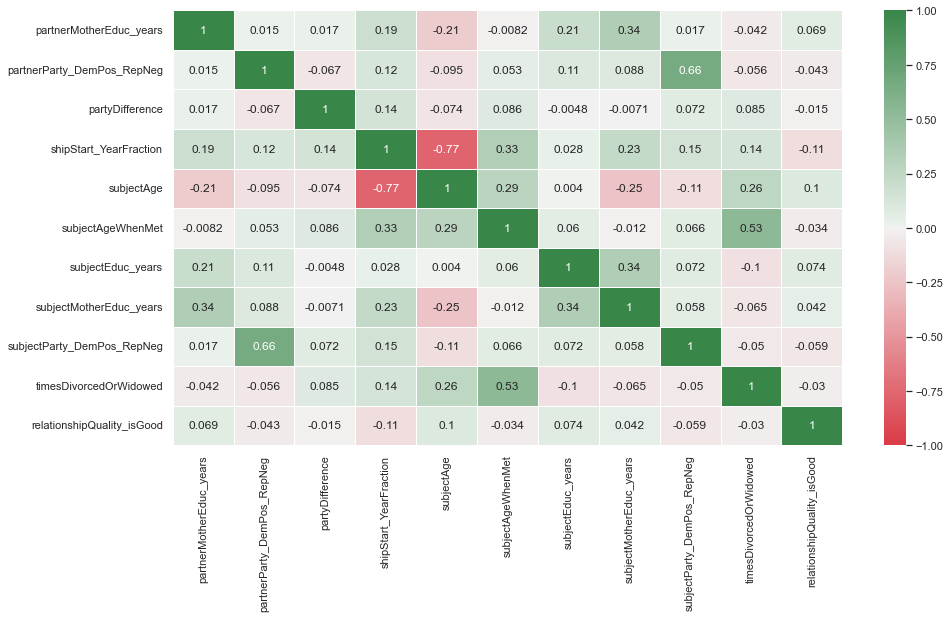

In [16]:
# limit the number of columns
corr_df = training_set.iloc[:,45:90]
corr_df["relationshipQuality_isGood"] = training_set["relationshipQuality_isGood"]

# calculate the correlation matrix
corr_matrix = corr_df.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

**Notes:** 

- It seems most of the columns visualized here do not have much correlation with relationshipQuality_isGood.

    
    - subjectAge and education seems to have some very weak correlation with relationship quality.

---

### Top positive correlations

In [17]:
# Create a function that will get the correlations and p-values into one dataframe

# The arguments it takes in: 

# n_pairs - the number of top correlations you want, 

# ascending - if you want the top or bottom correlations

# pair_by_col - (optional) if you want only the top correlations for a specific column


def getTopCorrWithPval(n_pairs, ascending, pair_by_col=None):

    # Get correlation matrix
    correlations = training_set.corr()

    # unstack the matrix
    s = correlations.unstack()

    # sort the values
    sorted_vals = s.sort_values(kind="quicksort", ascending=ascending)
    
    # keep only pairs related to pair_by_col
    
    if pair_by_col != None:
        
        sorted_vals = sorted_vals.loc[pair_by_col]
        


    # keep just the top correlations
    col_count = len(correlations)

    top_rows = n_pairs

    top_correlations = sorted_vals[0 + col_count: top_rows + col_count] if pair_by_col == None else sorted_vals[0: n_pairs]

    
    # convert top correlations to dataframe
    top_corr_df = pd.DataFrame(top_correlations)

    # rename column
    top_corr_df.columns = ["Pearsons_r"]


    # Get p-values as a dataframe --------------

    from scipy.stats import pearsonr

    def calculate_pvalues(df):

        df = df.dropna()._get_numeric_data()

        dfcols = pd.DataFrame(columns=df.columns)

        pvalues = dfcols.transpose().join(dfcols, how='outer')

        for r in df.columns:

            for c in df.columns:

                pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)

        return pvalues


    p_val_df = calculate_pvalues(training_set)


    # Loop through top correlations, get corresponding p-value, save as a dataframe

    top_pairs = list(top_corr_df.index)
    

    p_vals_with_names = top_corr_df.copy() # copying to get the top correlation pairing names

    p_vals_with_names.columns = ["p_val"]
    

    for pair in top_pairs:

        if pair_by_col == None:
        
            p_value = p_val_df.loc[pair[0], pair[1]]

            p_vals_with_names.loc[pair[0], pair[1]] = p_value
            
        else:
            
            p_value = p_val_df.loc[pair, pair_by_col]

            p_vals_with_names.loc[pair] = p_value



    # combine the correlation values and p-values
    corr_p_val_df = pd.concat([top_corr_df, p_vals_with_names], axis=1)

    return corr_p_val_df



top_positive_pairings = getTopCorrWithPval(n_pairs=24, ascending=False)

top_positive_pairings

,,Pearsons_r,p_val
shipStart_YearFraction,met_YearFraction,0.964212,0.0
met_YearFraction,shipStart_YearFraction,0.964212,0.0
subjectAge,partnerAge,0.926556,0.0
partnerAge,subjectAge,0.926556,0.0
householdSize,householdMinor_num,0.783710,0.0
householdMinor_num,householdSize,0.783710,0.0
householdAdults_num,householdSize,0.697480,0.0
householdSize,householdAdults_num,0.697480,0.0
partnerParty_DemPos_RepNeg,subjectParty_DemPos_RepNeg,0.662116,0.0
subjectParty_DemPos_RepNeg,partnerParty_DemPos_RepNeg,0.662116,0.0


**NOTES: Top Positive Correlations** 

(All correlations here have a p-value of 0, so we can say these correlations are statistically significant.)

**_________Interesting Findings__________**

.

[**partnerParty_DemPos_RepNeg + subjectParty_DemPos_RepNeg**] 

- People date others that have similar political ideologies.

[**partnerEduc_years + subjectEduc_years**] 

- Partners and subjects education years are strongly correlated. People date others with is similar education levels.

[**ageGap + subjectAgeWhenMet**]

- The older a subject is when meeting partner, the more larger their age gap is to be.

[**subjectMotherEduc_years + partnerMotherEduc_years**]

- The education of partner's and subject's mothers are correlated too!


    - [**subjectMotherEduc_years + subjectEduc_years**] [**partnerEduc_years + partnerMotherEduc_years**]
    
        - Probably because the more education a mother has had, the more education the subject is likely to have had.



.

**________Less Interesting Findings________**

.

[**met_YearFraction + shipStart_YearFraction**] 

- The time couples met and the time they started their relationships are correlated.
    
    
[**partnerAge + subjectAge**] 

- Partner age and subject ages are correlated. Most people date in their age range.


[**householdSize + householdMinor_num/householdAdults_num**] 

- All of these are are correlated since they all count members.


[**subjectAgeWhenMet + timesDivorcedOrWidowed**] 

- Age when met and number of times divorced/widowed are correlated. The older a couple is when they met the more likely they've had a past marriage that ended.

[**householdIncome + subjectEduc_years/partnerEduc_years**] 

- The more years of education the couple has had, the higher their household income tends to be.

[**subjectAgeWhenMet + met_YearFraction**] 

- The older a subject is when meeting partner, the more recent the meeting year will be.




---

### Top negative correlations

In [18]:
top_negative_pairings = getTopCorrWithPval(n_pairs=24, ascending=True)

top_negative_pairings

,,Pearsons_r,p_val
subjectAge,partnerMotherEduc_years,-0.209677,0.0
partnerMotherEduc_years,subjectAge,-0.209677,0.0
partnerAge,partnerMotherEduc_years,-0.206991,0.0
partnerMotherEduc_years,partnerAge,-0.206991,0.0
subjectAgeWhenMet,householdSize,-0.204729,0.0
householdSize,subjectAgeWhenMet,-0.204729,0.0
met_to_shipStart_diff,met_YearFraction,-0.184173,0.0
met_YearFraction,met_to_shipStart_diff,-0.184173,0.0
subjectAgeWhenMet,householdAdults_num,-0.163909,0.0
householdAdults_num,subjectAgeWhenMet,-0.163909,0.0


**NOTES: Top Negative Correlations** 

(All correlations here have a p-value of 0, so we can say these correlations are statistically significant.)

**_________Interesting Findings__________**

. 


[**met_to_shipStart_diff + met_YearFraction**]

- The more recent the year the subject met their partner, the shorter the timespan will be from moving from just meeting as strangers to being in a relationship.


    - This is strange because a visualization by Nathan Yau shows the opposite:

        - https://flowingdata.com/2019/03/19/the-relationship-timeline-continues-to-stretch/

        - Maybe it was because Yau's visualization was based on median time gaps?

        - Could their be some outlier couples that are skewing the data?
        
[**isHispanic + subjectMotherEduc_years/partnerMotherEduc_years/subjectEduc_years**]

- If a subject identified as Hispanic, their education, their mother's education, and their partner's mother's education levels are likely to be a bit lower.


.

**_______Less Interesting Findings________**

. 

[**partnerAge/subjectAge, partnerMotherEduc_years**] 

- The older a subject and partner is, the more likely the partner's mother will have less years of education. 

     - Past generations have had less years of education.

[**subjectAgeWhenMet, householdSize/householdAdults_num/householdMinor_num**]

- The younger the subject was when meeting their partner, the larger their household size is likely to be. 

    - Probably long time couples are likely to have had children over time.

[**numOfTimesMarried + met_YearFraction**]

- A subject is more likely to be married one or more times if they met their partner longer time ago.

    - Couples that met long ago probably got married and count as 1 marriage, which brings the average up.
    
[**householdIncome, shipStart_YearFraction/met_YearFraction**]

- The more recent a relationship has started, their household income will likely be lower. Maybe this is due to the fact that older couples had more time to accumulate wealth.

[**met_YearFraction, relationshipQuality_isGood**]

- The farther back a couple has met, the more likely the subject is to rate their relationship higher. - Lasted the test of time.


---

### Top Positive Correlations with RelationshipQuality_isGood

In [19]:
top_label_pairings = getTopCorrWithPval(n_pairs=11,
                                        ascending=False,
                                        pair_by_col="relationshipQuality_isGood")

top_label_pairings

,Pearsons_r,p_val
relationshipQuality_isGood,1.000000,0.0000
householdIncome,0.102004,0.0000
subjectAge,0.099504,0.0000
partnerEduc_years,0.088878,0.0000
partnerAge,0.085148,0.0001
subjectEduc_years,0.074172,0.0007
partnerMotherEduc_years,0.069184,0.0016
subjectMotherEduc_years,0.041551,0.0578
met_to_shipStart_diff,0.039575,0.0707
numRelativesSeePerMonth,0.001642,0.9402


**NOTES: Top Positive Correlations with RelationshipQuality_isGood** 


(Interpreting only the correlations with p-values below 0.05)

**householdIncome** 

- With higher household's incomes, the subjects rated their relationship slightly higher.

**subjectAge/partnerAge** 

- The higher a subject's or partner's age, the more likely they are to rate their relationship quality higher.

**partnerEduc_years/subjectEduc_years/partnerMotherEduc_years** 

- The higher the education levels of a partner, a subject, and the subject's mother is the more likely they are to rate their relationship quality higher.



*Pluses* (higher Income, older age, more education)

---

### Top Negative Correlations with RelationshipQuality_isGood

In [20]:
bottom_label_pairings = getTopCorrWithPval(n_pairs=10,
                                        ascending=True,
                                        pair_by_col="relationshipQuality_isGood")

bottom_label_pairings

,Pearsons_r,p_val
met_YearFraction,-0.118335,0.0000
shipStart_YearFraction,-0.109320,0.0000
householdMinor_num,-0.075959,0.0005
householdSize,-0.060212,0.0059
subjectParty_DemPos_RepNeg,-0.058733,0.0073
ageGap,-0.053706,0.0142
isHispanic,-0.050636,0.0207
partnerParty_DemPos_RepNeg,-0.042629,0.0516
subjectAgeWhenMet,-0.033898,0.1217
timesDivorcedOrWidowed,-0.030248,0.1673


**NOTES: Top Positive Correlations with RelationshipQuality_isGood** 


(Interpreting only the correlations with p-values below 0.05)

**met_YearFraction / shipStart_YearFraction** 

- The farther back a subject has met their partner, the higher the subject will rate their relationship.

**householdMinor_num / householdSize** 

- The higher the number of minors in a subject's household, the lower they tend to rate their relationships.

**subjectParty_DemPos_RepNeg** 

- The more a subject/partner leaned towards the democratic party, the lower the subject tended to rate their relationships.

    - Within this dataset, Republican subjects tended to be older in age. 
    
    - Older subjects rated their relationships higher. 
    
    - This may be an age issue and not a political party issue.

**ageGap**

- The higher the age gap in a relationship, the lower the subject tends to rate their relationship.

**isHispanic** 

- If the subject identifies as Hispanic, the lower the subject tends to rate their relationship.


*Pluses* (Older relationships)

*Minuses*  (household minors, larger age gap, Hispanic)

---

array([[<AxesSubplot:title={'center':'ageGap'}>,
        <AxesSubplot:title={'center':'householdAdults_num'}>,
        <AxesSubplot:title={'center':'householdIncome'}>,
        <AxesSubplot:title={'center':'householdMinor_num'}>,
        <AxesSubplot:title={'center':'householdSize'}>],
       [<AxesSubplot:title={'center':'met_YearFraction'}>,
        <AxesSubplot:title={'center':'met_to_shipStart_diff'}>,
        <AxesSubplot:title={'center':'numRelativesSeePerMonth'}>,
        <AxesSubplot:title={'center':'partnerAge'}>,
        <AxesSubplot:title={'center':'partnerEduc_years'}>],
       [<AxesSubplot:title={'center':'partnerMotherEduc_years'}>,
        <AxesSubplot:title={'center':'partnerParty_DemPos_RepNeg'}>,
        <AxesSubplot:title={'center':'partyDifference'}>,
        <AxesSubplot:title={'center':'shipStart_YearFraction'}>,
        <AxesSubplot:title={'center':'subjectAge'}>],
       [<AxesSubplot:title={'center':'subjectAgeWhenMet'}>,
        <AxesSubplot:title={'center':'

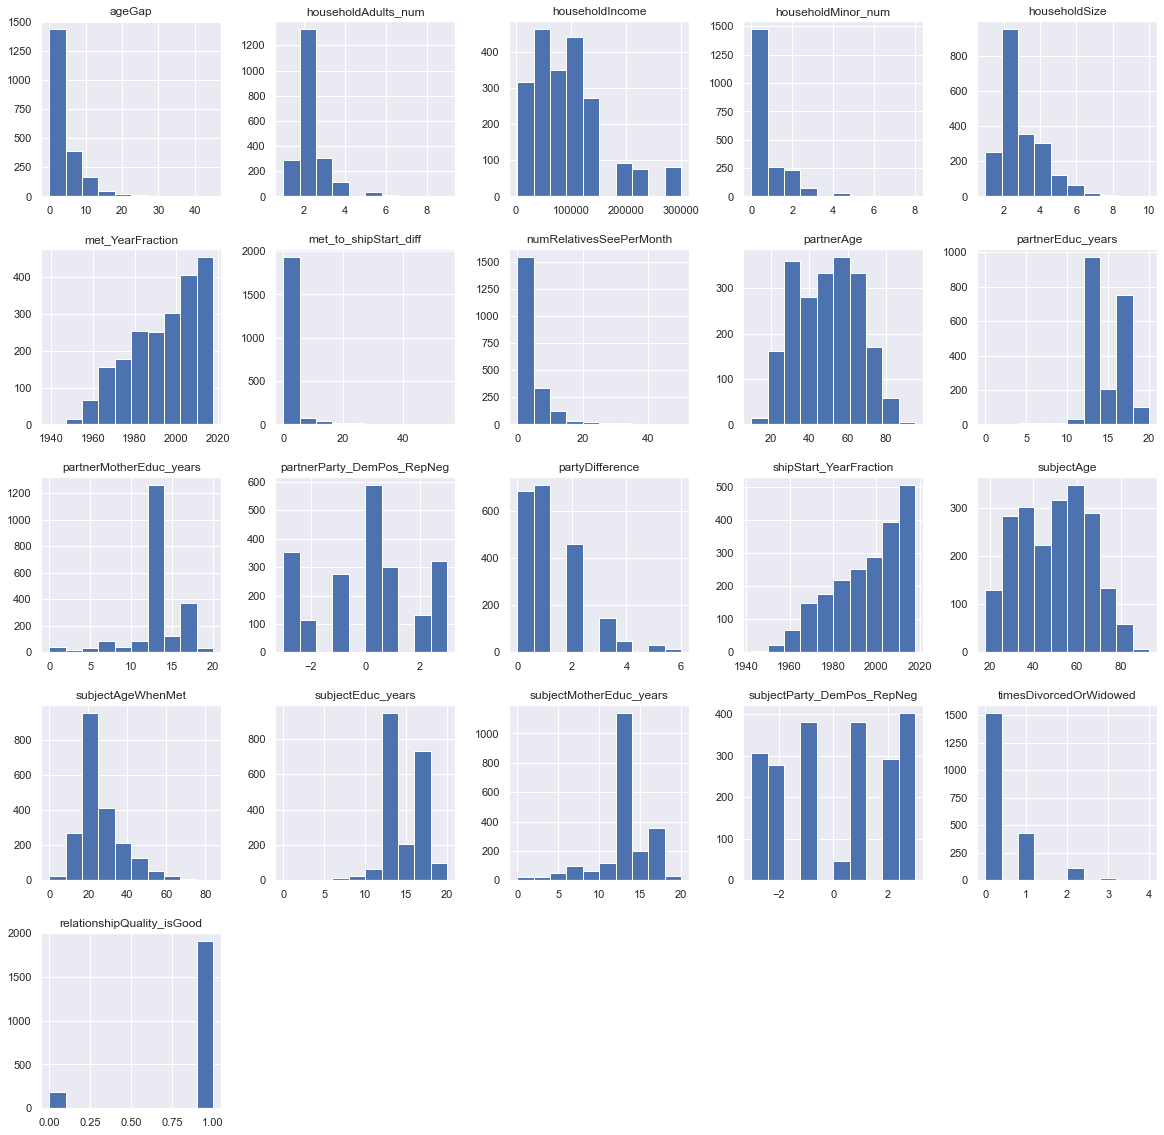

In [21]:
training_set.hist(figsize=(20,20))

**NOTES:** 

- Many couples met in their 20's and 30's.

- The distribution of partner ages is slightly older than subject ages

- Most relationships started in recent years. 

- In this dataset, most subjects have been married 1 time.

---

### Exploring Democrat v Republican


#### Ages:

Investigating way being more democratic seems to have subjects rate their relationships lower.

Could it be that democrats are younger and republicans are older?

(Older relationships have stood the test of time and other failed relationships, so it's possible that it's more of an age related issue than a political party issue.)

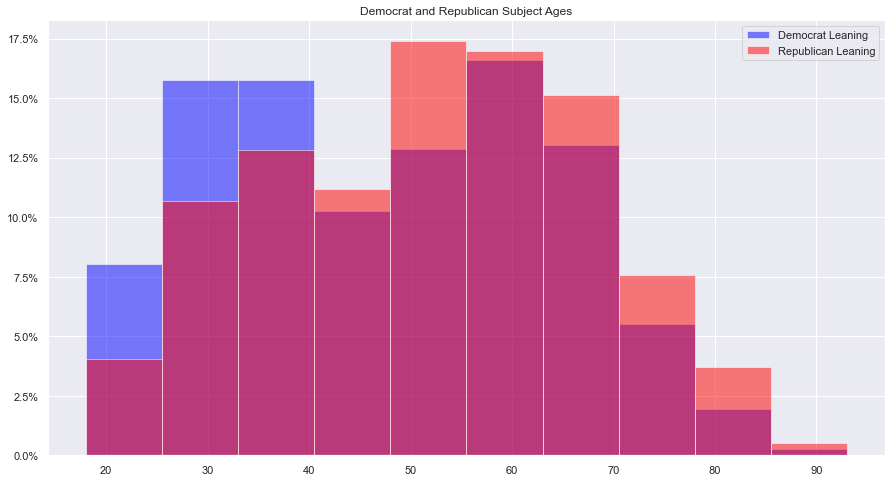

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter




dems = training_set[training_set["subjectParty_DemPos_RepNeg"] > 0]
reps = training_set[training_set["subjectParty_DemPos_RepNeg"] < 0]



plt.hist(dems["subjectAge"], 
        bins=10, 
        alpha=0.5, 
        label='Democrat Leaning',
        color="blue",
        weights=np.ones(len(dems)) / len(dems))
plt.hist(reps["subjectAge"], 
        bins=10, 
        alpha=0.5, 
        label='Republican Leaning',
        color="red",
        weights=np.ones(len(reps)) / len(reps))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.title("Democrat and Republican Subject Ages")
plt.legend(loc='upper right')
plt.show()

**NOTES:**

- It seems that Republicans are slightly older.

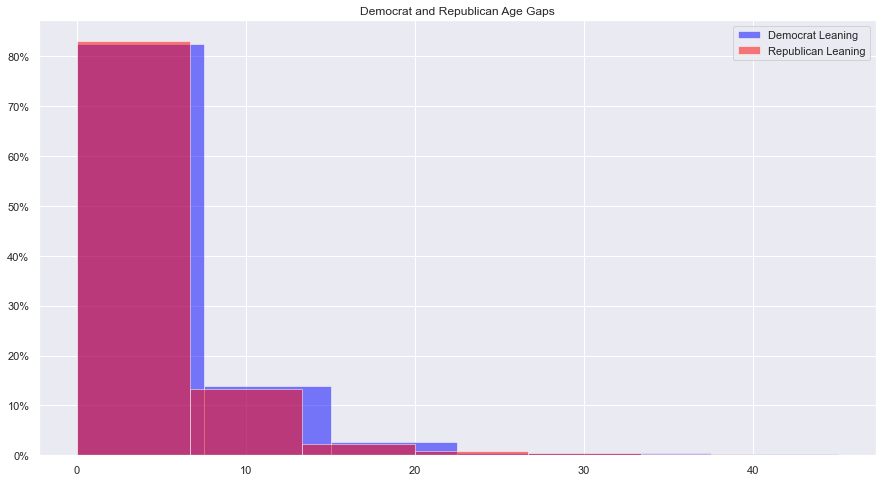

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter



dems = training_set[training_set["subjectParty_DemPos_RepNeg"] > 0]
reps = training_set[training_set["subjectParty_DemPos_RepNeg"] < 0]

plt.hist(dems["ageGap"], 
        bins=6, 
        alpha=0.5, 
        label='Democrat Leaning',
        color="blue",
        weights=np.ones(len(dems)) / len(dems))

plt.hist(reps["ageGap"], 
        bins=6, 
        alpha=0.5, 
        label='Republican Leaning',
        color="red",
        weights=np.ones(len(reps)) / len(reps))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.title("Democrat and Republican Age Gaps")
plt.legend(loc='upper right')
plt.show()

**NOTES:** 

It seems couple age gaps for both parties is about the same.

### Pairplots with top positive correlations with outcome label

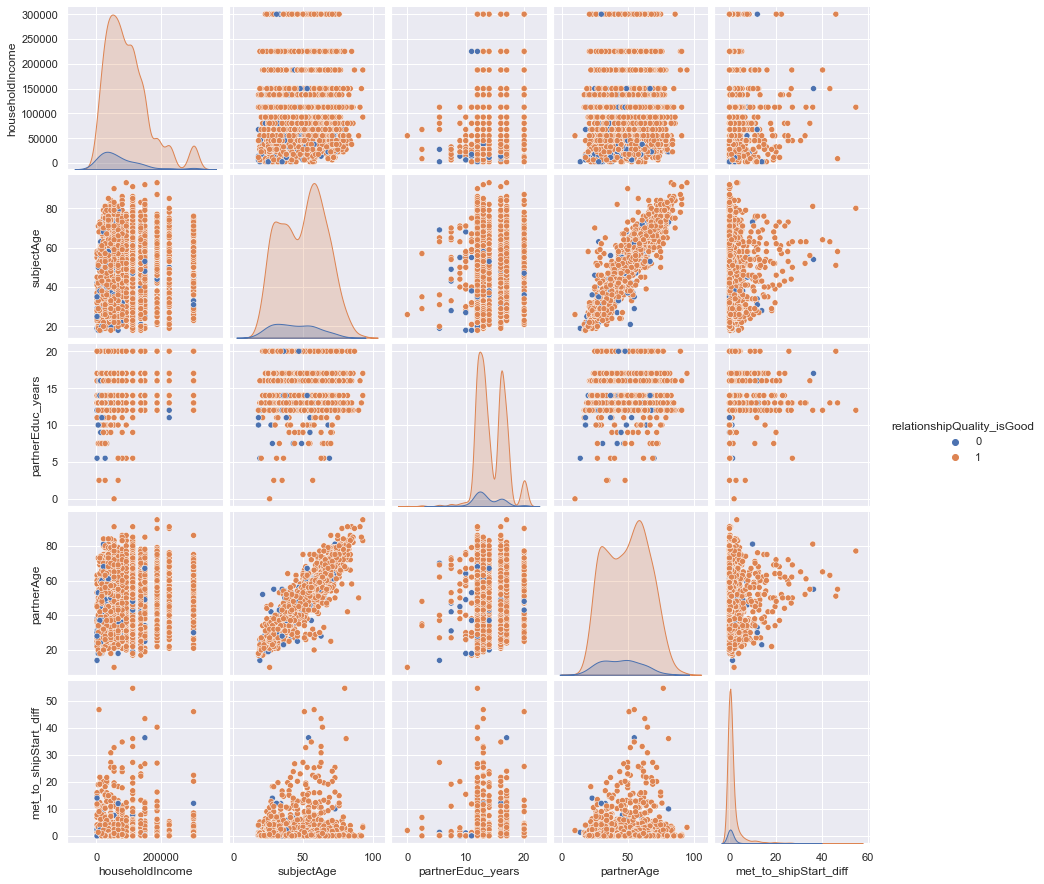

In [24]:
features = ["relationshipQuality_isGood",
            "householdIncome",
            "subjectAge",
            "partnerEduc_years",
            "partnerAge",
            "met_to_shipStart_diff"
           ]

sns.pairplot(training_set[features],
            hue="relationshipQuality_isGood")

### Pairplots with top negative correlations with outcome label

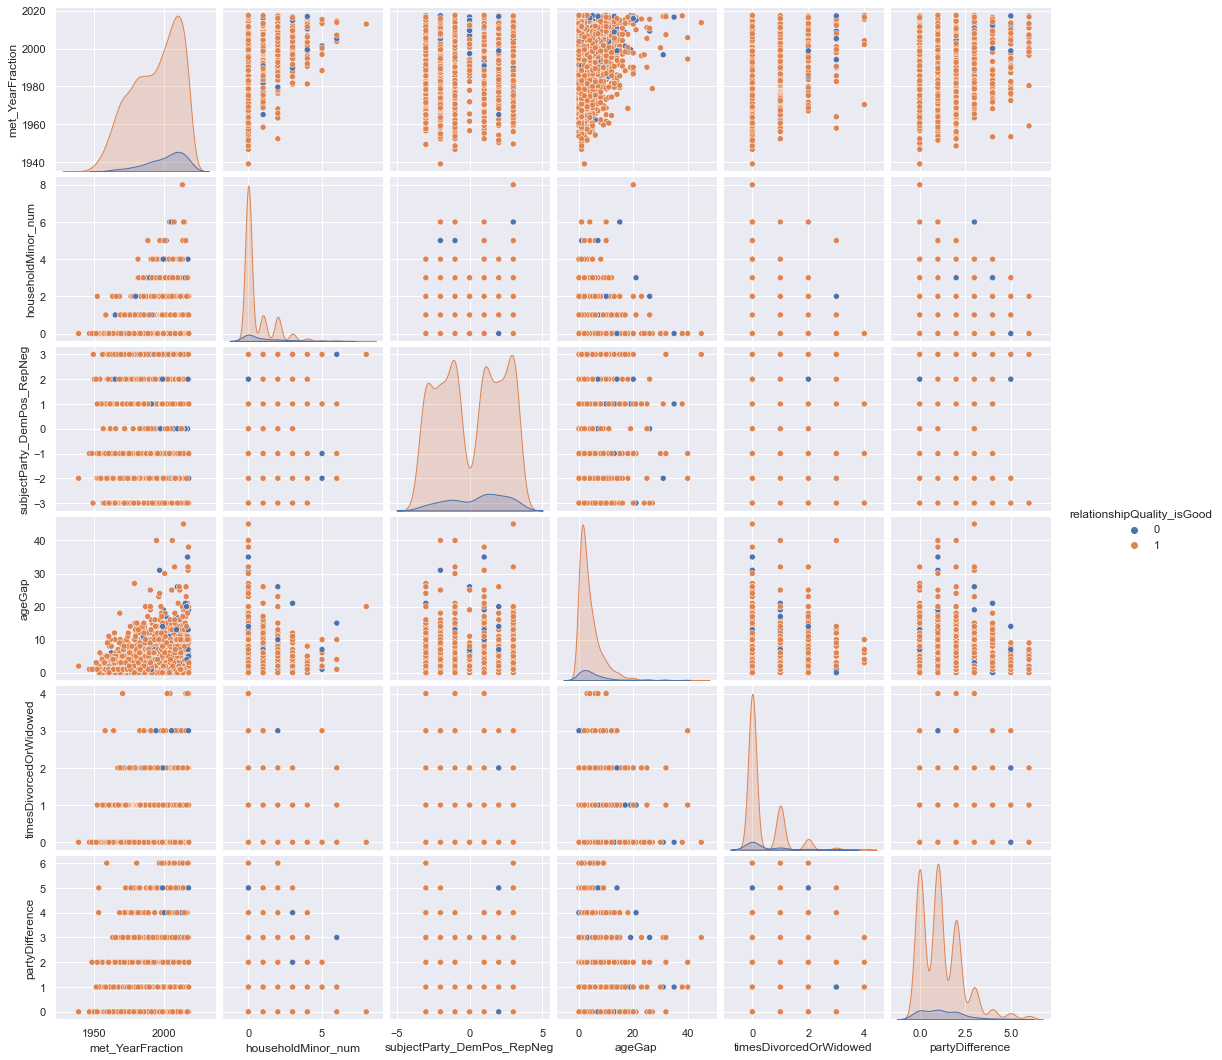

In [25]:
features = ["relationshipQuality_isGood",
            "met_YearFraction",
            "householdMinor_num",
            "subjectParty_DemPos_RepNeg",
            "ageGap",
            "timesDivorcedOrWidowed",
            "partyDifference"
           ]

sns.pairplot(training_set[features],
            hue="relationshipQuality_isGood")